<a href="https://colab.research.google.com/github/maalvarezcabanes/algoritmos_optimizacion/blob/main/Algoritmos_Miguel_Angel_Alvarez_Cabanes_AG1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad Guiada 1
## Autor
Miguel Ángel Álvarez Cabanes
## Github
https://github.com/maalvarezcabanes/algoritmos_optimizacion

## Importación paquetes y funciones auxiliares

In [44]:
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
def clean_plot(ax, xlabel, ylabel, title, legend = True, rotate = 45):
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    if legend:
        ax.legend(bbox_to_anchor=(1.2, 1))
    if rotate:
        ax.tick_params(axis='x', labelrotation = rotate)

## Torres de Hanoi
### Implementación del algoritmo
Para la implementación del algoritmo me he basado en la solución presentada durante la sesión de actividades, pero he incorporado algunas modificaciones:
1. Aunque no es necesario, llamo también a la misma función "torres_hanoi" para el movimiento del bloque más grande de cada iteración. Computacionalmente requiere de una llamada de función adicional, pero el código es más homogeneo en mi opinión.
2. No escribo en pantalla los movimientos de forma directa sino que los almaceno en una lista y uso una función de impresión separada porque después quiero usar la función para una visualización de complejidades para la que no voy a necesitar imprimir los movimientos

In [21]:
def imprimir_lista_de_movimientos(lista_de_movimientos):
    for i in lista_de_movimientos:
        print(f"Mover bloque de {i[0]} a {i[1]}")
        
def torres_hanoi(N, origen, destino, pivote, lista_de_movimientos):
    if N == 1:
        lista_de_movimientos.append((origen, destino))
        return lista_de_movimientos
    
    lista_de_movimientos = torres_hanoi(N-1, origen, pivote, destino, lista_de_movimientos)
    lista_de_movimientos = torres_hanoi(1, origen, destino, pivote, lista_de_movimientos)
    lista_de_movimientos = torres_hanoi(N-1, pivote, destino, origen, lista_de_movimientos)
    return lista_de_movimientos

In [22]:
lista_de_movimientos = []
lista_de_movimientos = torres_hanoi(4, 1, 2, 3, lista_de_movimientos)
imprimir_lista_de_movimientos(lista_de_movimientos)

Mover bloque de 1 a 3
Mover bloque de 1 a 2
Mover bloque de 3 a 2
Mover bloque de 1 a 3
Mover bloque de 2 a 1
Mover bloque de 2 a 3
Mover bloque de 1 a 3
Mover bloque de 1 a 2
Mover bloque de 3 a 2
Mover bloque de 3 a 1
Mover bloque de 2 a 1
Mover bloque de 3 a 2
Mover bloque de 1 a 3
Mover bloque de 1 a 2
Mover bloque de 3 a 2


### Complejidad
Para un análisis gráfico de la complejidad del algoritmo, voy a ejecutar el algoritmo para una serie de valores de números de bloques y representar una gráfica comparando con complejidades de O(n), O(n^2), O(2^n) y O(n!)

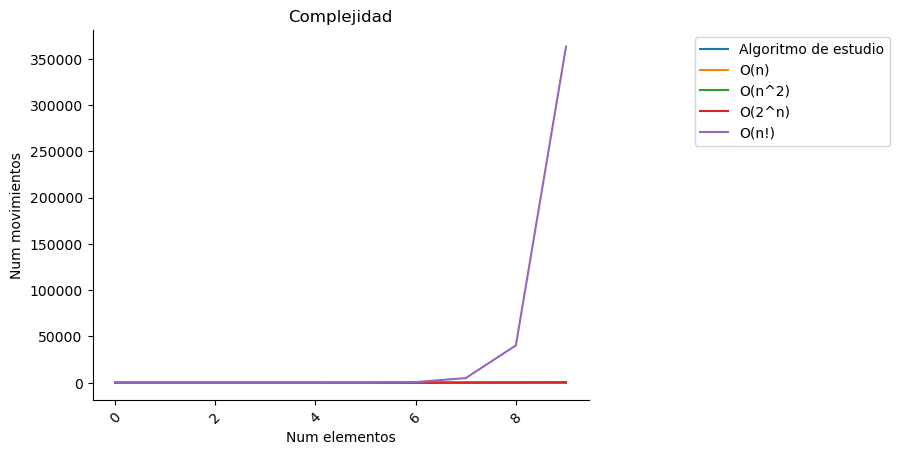

In [51]:
max_num = 10
num_movements = []
num_movements_n = [i for i in range(max_num)]
num_movements_n2 = [i**2 for i in range(max_num)]
num_movements_2n = [2**i for i in range(max_num)]
num_movements_nfact = [math.factorial(i) for i in range(max_num)]

for i in range(max_num):
    lista_de_movimientos = []
    if i == 0:
        num_movements.append(0)
    else:
        num_movements.append(len(torres_hanoi(i, 1, 2, 3, lista_de_movimientos)))
                         
fig, ax = plt.subplots(1, 1)
ax.plot(num_movements, label="Algoritmo de estudio")
ax.plot(num_movements_n, label="O(n)")
ax.plot(num_movements_n2, label="O(n^2)")
ax.plot(num_movements_2n, label="O(2^n)")
ax.plot(num_movements_nfact, label="O(n!)")
clean_plot(ax, "Num elementos", "Num movimientos", "Complejidad")
plt.show();

Se puede observar que ya para n=10 la complejidad de O(n!) es tan dominante que no deja observar la comparación de la complejidad del algoritmo en estudio

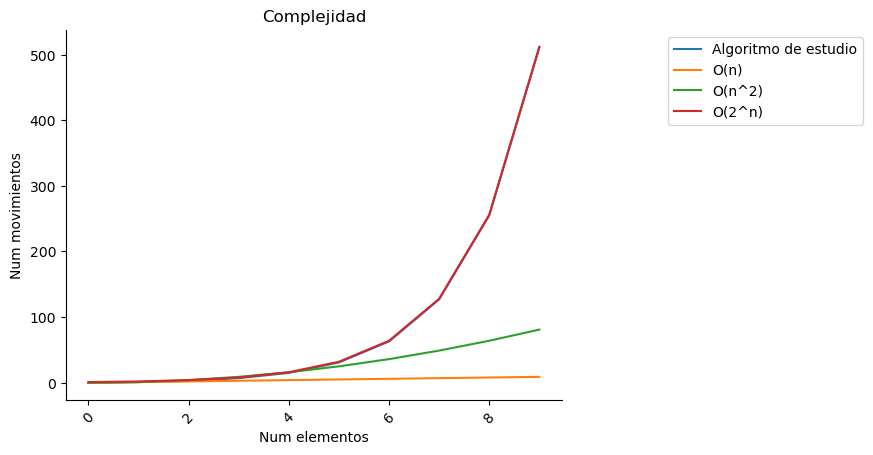

In [53]:
fig, ax = plt.subplots(1, 1)
ax.plot(num_movements, label="Algoritmo de estudio")
ax.plot(num_movements_n, label="O(n)")
ax.plot(num_movements_n2, label="O(n^2)")
ax.plot(num_movements_2n, label="O(2^n)")
clean_plot(ax, "Num elementos", "Num movimientos", "Complejidad")
plt.show();

Si no representamos O(n!) podemos ver como la complejidad del algoritmo implementado para las torres de Hanoi se mapea perfectamente con O(2^n)